In [ ]:
import pandas as pd

df = pd.read_csv('/content/heart.csv')


df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [ ]:
df.fillna(df.median(), inplace=True)

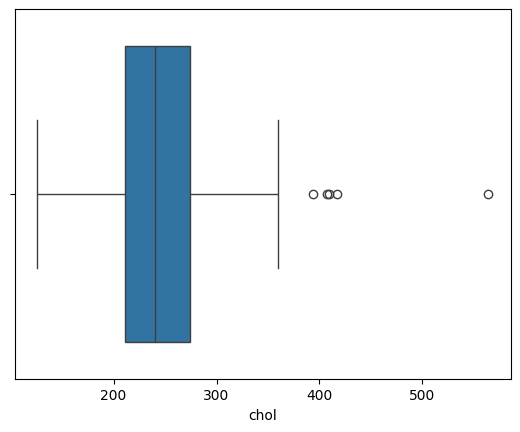

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['chol'])
plt.show()


In [ ]:
import pandas as pd

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    cap_outliers(df, col)

df.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.0,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.280528,245.134488,0.0,0.528053,149.692244,0.326733,1.024422,1.399340,0.671617,2.316832,0.544554
std,9.082101,0.466011,1.032052,16.582241,47.552910,0.0,0.525860,22.762004,0.469794,1.110127,0.616226,0.885078,0.601004,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.0,0.000000,84.750000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.0,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.0,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.0,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,369.750000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.500000,3.000000,1.000000


In [ ]:
corr_matrix = df.corr()

corr_matrix['output'].sort_values(ascending=False)


,output
output,1.000000
cp,0.433798
thalachh,0.422210
slp,0.345877
restecg,0.137230
chol,-0.103987
trtbps,-0.138621
age,-0.225439
sex,-0.280937
thall,-0.350974


In [ ]:
from sklearn.model_selection import train_test_split

y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8360655737704918


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.8360655737704918


Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Random Forest ROC-AUC Score: 0.9401939655172414


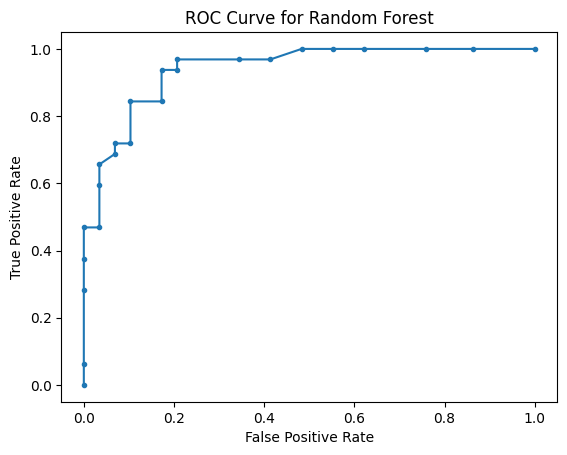

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))

rf_probs = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, rf_probs)

print("Random Forest ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))

print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))


Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

